# Lecture 16 Part 2 - Fisher's Linear Discriminant Function (FLDA or simply LDA)

# Discriminant Functions

A discriminant is a function that takes an input vector $x$ and assigns it to one of $K$ classes, denoted $C_k$. 

Let's restrict our attention to **linear discriminants**, namely those for which the decision surfaces are hyperplanes. To simplify the discussion, we consider first the case of two classes and then investigate the extension to $K > 2$ classes.

### Two Classes

The simplest representation of a linear discriminant function is obtained by taking a linear function of the input vector so that

\begin{align*}
y(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + b
\end{align*}

where $\mathbf{w}$ is called a **weight vector**, and $b$ is a **bias** (not to be confused with bias in the statistical sense). The negative of the bias is sometimes called a threshold. An input vector $\mathbf{x}$ is assigned to class $C_1$ if $y(\mathbf{x}) \geq 0 $ and to class $C_2$ otherwise.

*Looks pretty familiar, right?* If you are on one side of the line, then you are in class 1.  If you are on the other side of the line, then you are in class 2.  So, the decision boundary is $y(\mathbf{x}) = 0$.

* The vector $\mathbf{w}$ is orthogonal to every vector lying within the decision surface, and so $\mathbf{w}$ determines the orientation of the decision surface. 

* Similarly, if $\mathbf{x}$ is a point on the decision surface, then $y(\mathbf{x})=0$, and so the normal distance from the origin to the decision surface is given by: $\frac{y(\mathbf{\overrightarrow{x}})}{\left\| \mathbf{\overrightarrow{w}} \right\|}$ 

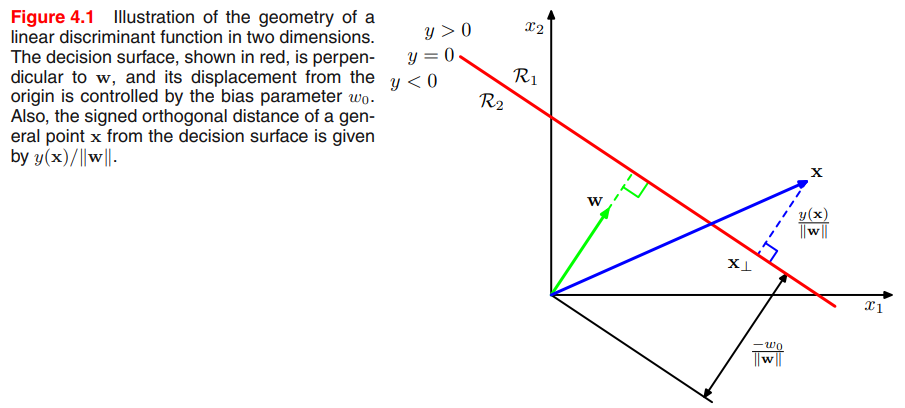

In [1]:
from IPython.display import Image
Image('figures/Figure4.1.png', width=800)
# Source: Bishop textbook

---

## Fisher's Linear Discriminant Analysis (or LDA)

A very popular type of a linear discriminant is the **Fisher's Linear Discriminant**.

* Given two classes, we can compute the mean of each class:

\begin{align*}
\mathbf{\overrightarrow{m}}_1 &= \frac{1}{{N}_1}\sum_{n\in C_1} \mathbf{\overrightarrow{x}_n}\\
\mathbf{\overrightarrow{m}_2} &= \frac{1}{N_2}\sum_{n\in C_2} \mathbf{\overrightarrow{x}_n}
\end{align*}

We can maximize the separation of the means:

\begin{align*}
m_2 - m_1 = \mathbf{\overrightarrow{w}}^T(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)
\end{align*}

* $\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}$ takes a $D$ dimensional data point and projects it down to 1-D with a weight sum of the original features. We want to find a weighting that maximizes the separation of the class means. 

* Not only do we want well separated means for each class, but we also want each class to be *compact* to minimize overlap between the classes. 

* Consider the *within class variance:*

\begin{align*}
s_k^2 = \sum_{n \in C_k} (y_n - m_k)^2 &= \sum_{n \in C_k} (\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}_n - m_k)^2 \\
&= \mathbf{\overrightarrow{w}}^T \sum_{n \in C_k} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}_k}) (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}_k})^T \mathbf{\overrightarrow{w}}
\end{align*}

* So, we want to minimize within class variance and maximize between class separability. How about the following objective function:

\begin{align*}
J(\mathbf{w}) &= \frac{(m_2 - m_1)^2}{s_1^2 + s_2^2}\\
      &= \frac{\mathbf{\overrightarrow{w}}^T(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}}}{\sum_{n \in C_1} (\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}_n - m_1)^2 + \sum_{n \in C_2} (\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}_n - m_2)^2}\\
	  &= \frac{\mathbf{\overrightarrow{w}}^T(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}}}{\mathbf{\overrightarrow{w}}^T\left(\sum_{n \in C_1} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)^T + \sum_{n \in C_2} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)^T\right)\mathbf{\overrightarrow{w}}}\\
	  &= \frac{\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}}}{\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}}}
\end{align*}

where

\begin{align*}
S_B = (\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T
\end{align*}

and 

\begin{align*}
S_W= \sum_{n \in C_1} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)^T + \sum_{n \in C_2} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)^T
\end{align*}

* Ok, so let's optimize:

\begin{align*}
\frac{\partial J(\mathbf{\overrightarrow{w}})}{\partial \mathbf{\overrightarrow{w}}} &= \frac{2(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})\mathbf{S}_B\mathbf{\overrightarrow{w}} - 2(\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}})\mathbf{S}_W\mathbf{\overrightarrow{w}}}{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})^2} = 0 \\
0 &= \ \frac{\mathbf{S}_B\mathbf{\overrightarrow{w}}}{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})} -\frac{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}})\mathbf{S}_W\mathbf{\overrightarrow{w}}}{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})^2} \\
 (\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})\mathbf{S}_B\mathbf{\overrightarrow{w}} &= (\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}})\mathbf{S}_W\mathbf{\overrightarrow{w}} \\
 \mathbf{S}_B \mathbf{\overrightarrow{w}} &= \frac{\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}}}{\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}}} \mathbf{S}_W\mathbf{\overrightarrow{w}}\\
 \mathbf{S}_W^{-1}\mathbf{S}_B\mathbf{\overrightarrow{w}} &= \lambda\mathbf{\overrightarrow{w}}
\end{align*}

where the scalar $\lambda = \frac{\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}}} { \mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}}}$

#### *Does this look familiar?*

This is the generalized eigenvalue problem!

* So the direction of projection correspond to the eigenvectors of $\mathbf{S}_W^{-1}\mathbf{S}_B$ with the largest eigenvalues.

The solution is easy when $S_w^{-1} = (\Sigma_1 + \Sigma_2)^{-1}$ exists.

In this case, if we use the definition of $S_B = (\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T$:

\begin{align*}
S_W^{-1}S_B\mathbf{\overrightarrow{w}} &= \lambda\mathbf{\overrightarrow{w}}\\
S_W^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}} &= \lambda\mathbf{\overrightarrow{w}}
\end{align*}

Noting that $\alpha = (\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}}$ is a constant, this can be written as:

$$S_W^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1) = \frac{\lambda}{\alpha}\mathbf{\overrightarrow{w}}$$

* Since we don't care about the magnitude of $\mathbf{\overrightarrow{w}}$:

$$\mathbf{\overrightarrow{w}}^* = S_W^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1) = (\Sigma_1 + \Sigma_2)^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)$$

Make sure $\mathbf{\overrightarrow{w}}^*$ is a unit vector by taking: $\mathbf{\overrightarrow{w}}^* \leftarrow \frac{\mathbf{\overrightarrow{w}}^*}{\Vert\mathbf{\overrightarrow{w}}^*\Vert}$

* Note that if the within-class covariance, $S_W$, is isotropic, so that $S_W$ is proportional to the unit matrix, we find that $\mathbf{\overrightarrow{w}}$ is proportional to the difference of the class means.

* This result is known as *Fisher's linear discriminant*, although strictly it is not a discriminant but rather a specific choice of direction for projection of the data down to one dimension. However, the projected data can subsequently be used to construct a discriminant, by choosing a threshold $y_0$ so that we classify a new point as belonging to $C_1$ if $y(x) \geq y_0$ and classify it as belonging to $C_2$ otherwise.

Also, note that:
* For a classification problem with Gaussian classes of equal covariance $\Sigma_i=\Sigma$, the boundary is the plane of normal:
$$\mathbf{\overrightarrow{w}} = \Sigma^{-1}(\mathbf{\overrightarrow{m}}_i-\mathbf{\overrightarrow{m}}_j)$$

* If $\Sigma_2=\Sigma_1$, this is also the LDA solution.

This gives two different **interpretations** of LDA:

* It is optimal *if and only if* the classes are Gaussian and have equal covariance.

* A classifier on the LDA features, is equivalent to the boundary after the approximation of the data by two Gaussians with equal covariance.

The final discriminant decision boundary is $\mathbf{\overrightarrow{y}} = \mathbf{\overrightarrow{w}}^*\mathbf{\overrightarrow{x}} + w_0$

The *bias* term $w_0$ can be defined as:

$$w_0 = \left(\frac{1}{N_1}\sum_{n\in C_1}\overrightarrow{x}_n + \frac{1}{N_2}\sum_{n\in C_2}\overrightarrow{x}_n \right)\mathbf{\overrightarrow{w}}^*$$

* An extension to multi-class problems has a similar derivation.

**Limitations** of LDA:

1. LDA produces at most $C-1$ feature projections, where $C$ is the number of classes.

2. If the classification error estimates establish that more features are needed, some other method must be employed to provide those additional features.

3. LDA is a parametric method (it assumes unimodal Gaussian likelihoods).

4. If the distributions are significantly non-Gaussian, the LDA projections may not preserve complex structure in the data needed for classification.

5. LDA will also fail if discriminatory information is not in the mean but in the variance of the data.

A popular variant of LDA are the **Multi-Layer Perceptrons** (or MLPs).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [ ]:
def fisherDiscriminant(data,t):
    data1 = data[t==0,:]
    data2 = data[t==1,:]
    mean1 = np.atleast_2d(np.mean(data1,0))
    mean2 = np.atleast_2d(np.mean(data2,0))
    Sw1 = np.dstack([(data1[i,:]-mean1).T@(data1[i,:]-mean1) for i in range(data1.shape[0])])
    Sw2 = np.dstack([(data2[i,:]-mean2).T@(data2[i,:]-mean2) for i in range(data2.shape[0])])
    Sw = np.sum(Sw1,2) + np.sum(Sw2,2)
    w = np.linalg.inv(Sw)@(mean2 - mean1).T
    w = w/np.linalg.norm(w)
    data_t = data@w
    return w, data_t

def discriminant(data, labels, v):
    v_perp = np.array([v[1], -v[0]])
    b = ((np.mean(data[labels==0,:],axis=0)+np.mean(data[labels==1,:],axis=0))/2)@v
    lambda_vec = np.linspace(-3,3,len(data))
    v_line = lambda_vec * v
    decision_boundary = b * v + lambda_vec * v_perp
    return v_line, decision_boundary

# Generate Synthetic Data
N1 = 100 #number of points for class1
N2 = 100 #number of points for class0
covM = [1,0.01]*np.eye(2) # covariance matrix
data = np.random.multivariate_normal([0,0], covM, N1) #generate points  for class 1
X = np.vstack((data, np.random.multivariate_normal([1,1], covM, N2))) #generate points for class 0
labels = np.hstack((np.ones(N1),np.zeros(N2)))

plt.scatter(X[:,0],X[:,1],c=labels); plt.show();

In [ ]:
v, Y = fisherDiscriminant(X,labels)

plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=labels)

v_line, decision_boundary = discriminant(X, labels, v);

plt.plot(v_line[0], v_line[1], 'red', linewidth=3, label='Direction of Projection')
plt.plot(decision_boundary[0,:], decision_boundary[1,:],'blue',linewidth=3, label='Decision Boundary')
plt.title('LDA'); plt.axis('equal'); plt.legend(loc='best',fontsize=15);

---

# Fisher's LDA for Multiple Classes

We now consider the generalization of the Fisher discriminant to $K > 2$ classes, and we shall assume that the dimensionality $D$ of the input space is greater than the number $K$ of classes. Next, we introduce $M > 1$ linear "features" $\mathbf{y}_k = \mathbf{w}_k^T\mathbf{x}$, where $k = 1,\dots,M$ and $M\leq D$.

These feature values can conveniently be grouped together to form a vector $\mathbf{y}$. Similarly, the weight vectors $\{\mathbf{w}_k\}$ can be considered to be the columns of a matrix $\mathbf{W}$, so that

\begin{align*}
\mathbf{y} = \mathbf{W}^T\mathbf{x}
\end{align*}

Note that again we are not including any bias parameters in the definition of $\mathbf{y}$. The generalization of the within-class covariance matrix to the case of $K$ classes is as follows:

\begin{align*}
S_W = \sum_{k=1}^K S_k
\end{align*}

where 

\begin{align*}
S_k &= \sum_{n\in C_k} (x_n-\mathbf{\overrightarrow{m}}_k)^T(x_n-\mathbf{\overrightarrow{m}}_k)^T\\
\mathbf{\overrightarrow{m}}_k &= \frac{1}{N_k}\sum_{n\in C_k} x_n
\end{align*}

and $N_k$ is the number of patterns in class $C_k$. In order to find a generalization of the between-class covariance matrix, let's consider first the total covariance matrix:

\begin{align*}
S_T = \sum_{n=1}^N (x_n - \mathbf{\overrightarrow{m}})(x_n - \mathbf{\overrightarrow{m}})^T
\end{align*}

where $\mathbf{\overrightarrow{m}}$ is the mean of the total data set 

\begin{align*}
\mathbf{m} = \frac{1}{N}\sum_{n=1}^N x_n = \frac{1}{N} \sum_{k=1}^K N_k\mathbf{\overrightarrow{m}}_k
\end{align*}

and $N = \sum_{k=1}^K N_k$ is the total number of data points.

The total covariance matrix can be decomposed into the sum of the **within-class covariance scatter matrix** plus an additional matrix $S_B$, which we identify as a measure of the **between-class covariance**:

\begin{align*}
S_T = S_W + S_B
\end{align*}

where 

\begin{align*}
S_B = \sum_{k=1}^K N_k(\mathbf{\overrightarrow{m}}_k - \mathbf{\overrightarrow{m}})(\mathbf{\overrightarrow{m}}_k-\mathbf{\overrightarrow{m}})^T
\end{align*}

These covariance matrices have been defined in the original x-input space. We can now define similar matrices in the projected $M$-dimensional y-space:

\begin{align*}
s_W = \sum_{k=1}^K\sum_{n\in C_k} (\mathbf{y}_n - \mathbf{\mu}_k)(\mathbf{y}_n - \mathbf{\mu}_k)^T
\end{align*}

and

\begin{align*}
s_B = \sum_{k=1}^K N_k(\mathbf{\mu}_k -\mathbf{\mu})(\mathbf{\mu}_k -\mathbf{\mu})^T
\end{align*}

where 

\begin{align*}
\mathbf{\mu}_k &= \frac{1}{N_k}\sum_{n\in C_k} y_n\\
\mathbf{\mu} &= \frac{1}{N} \sum_{k=1}^K N_k \mathbf{\mu}_k
\end{align*}

Once again, we wish to construct a scalar that is large when the between-class covariance is large and when the within-class covariance is small.

\begin{align*}
J(\mathbf{W}) = \frac{s_B}{s_W}
\end{align*}

This criterion can then be rewritten as an explicit function of the projection matrix $\mathbf{W}$ in the form

\begin{align*}
J(\mathbf{w}) = \frac{\mathbf{W}S_B\mathbf{W}^T}{\mathbf{W}S_W\mathbf{W}^T}
\end{align*}

Maximization of such criteria is straightforward, though somewhat involved. The weight values are determined by those eigenvectors of $S_W^{-1}S_B$ that correspond to the $M$ largest eigenvalues.

There is one important result that is common to all such criteria, which is worth emphasizing. We first note that SB is composed of the sum of $K$ matrices, each of which is an outer product of two vectors and therefore of rank 1. In addition, only $(K − 1)$ of these matrices are independent. Thus, $S_B$ has rank at most equal to $(K − 1)$ and so there are at most $(K − 1)$ nonzero eigenvalues. 

This shows that the projection onto the $(K − 1)$-dimensional subspace spanned by the eigenvectors of $S_B$ does not alter the value of $J(\mathbf{w})$, and so we are therefore unable to find more than $(K − 1)$ linear "features".

---

### Limitations of LDA:

1. LDA produces at most $K-1$ feature projections, where $K$ is the number of classes.

2. If the classification error estimates establish that more features are needed, some other method must be employed to provide those additional features.

3. LDA is a parametric method (it assumes unimodal Gaussian likelihoods).

4. If the distributions are significantly non-Gaussian, the LDA projections may not preserve complex structure in the data needed for classification.

5. LDA will also fail if discriminatory information is not in the mean but in the variance of the data.

A popular variant of LDA are the **Multi-Layer Perceptrons** (or MLPs).

---